In [12]:
import pandas as pd 

dtype_dict = {'LAT_MT': str, 'LONG_MT': str}
mt_stop = pd.read_csv('data/agg_mt_gps_with_stop_time_for_surveilance_h30_08112024.csv', dtype=dtype_dict, low_memory=False)
display(mt_stop.dtypes)

print("\nJumlah data sebelum drop_duplicates:")
print("Jumlah data (rows):", mt_stop.shape[0])
print("Jumlah kolom:", mt_stop.shape[1])

# Step 1: Drop Duplicate Data
df_mt_stop = mt_stop.drop_duplicates().copy()
print("\nJumlah data setelah drop_duplicates:")
print("Jumlah data (rows):", df_mt_stop.shape[0])
print("Jumlah kolom:", df_mt_stop.shape[1])

# Step 2: Menghapus baris dengan LAMA_BERHENTI_JAM == 0
df_mt_stop['LAMA_BERHENTI_JAM'] = pd.to_numeric(df_mt_stop['LAMA_BERHENTI_JAM'], errors='coerce')
df_mt_stop = df_mt_stop[df_mt_stop['LAMA_BERHENTI_JAM'] != 0]
df_mt_stop = df_mt_stop.dropna(subset=['LAMA_BERHENTI_JAM'])
print("\nJumlah data setelah menghapus LAMA_BERHENTI_JAM == 0:")
print("Jumlah data (rows):", df_mt_stop.shape[0])
print("Jumlah kolom:", df_mt_stop.shape[1])

# Step 3: Mengidentifikasi dan Mengisi Nilai NaN
# a. Mengidentifikasi kolom string (object)
string_columns = df_mt_stop.select_dtypes(include=['object']).columns.tolist()
print("\nKolom bertipe string (object):")
print(string_columns)
df_mt_stop[string_columns] = df_mt_stop[string_columns].fillna('')
print("\nJumlah nilai NaN pada kolom string setelah pengisian:")
print(df_mt_stop[string_columns].isnull().sum())

# b. Mengidentifikasi kolom numerik
numerical_columns = df_mt_stop.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nKolom bertipe numerik:")
print(numerical_columns)
df_mt_stop[numerical_columns] = df_mt_stop[numerical_columns].fillna(0)
print("\nJumlah nilai NaN pada kolom numerik setelah pengisian:")
print(df_mt_stop[numerical_columns].isnull().sum())

# Step 4: Memperbaiki nilai LAT_MT dan LONG_MT yang tidak benar
# Pastikan 'LAT_MT' dan 'LONG_MT' bertipe string sebelum menggunakan .str accessor
df_mt_stop['LAT_MT'] = df_mt_stop['LAT_MT'].astype(str)
df_mt_stop['LONG_MT'] = df_mt_stop['LONG_MT'].astype(str)
mask_lat_salah = df_mt_stop['LAT_MT'].str.startswith('.') | df_mt_stop['LAT_MT'].str.startswith('-.')
mask_lon_salah = df_mt_stop['LONG_MT'].str.startswith('.') | df_mt_stop['LONG_MT'].str.startswith('-.')
latitude_salah = df_mt_stop[mask_lat_salah]
longitude_salah = df_mt_stop[mask_lon_salah]
print("\nLatitude yang tidak benar:")
display(latitude_salah)
print("\nLongitude yang tidak benar:")
display(longitude_salah)
df_mt_stop.loc[mask_lat_salah, 'LAT_MT'] = df_mt_stop.loc[mask_lat_salah, 'LAT_MT'].apply(
    lambda x: '0' + x if x.startswith('.') else '-0' + x[1:]
)
df_mt_stop.loc[mask_lon_salah, 'LONG_MT'] = df_mt_stop.loc[mask_lon_salah, 'LONG_MT'].apply(
    lambda x: '0' + x if x.startswith('.') else '-0' + x[1:]
)

df_mt_stop['LAT_MT'] = pd.to_numeric(df_mt_stop['LAT_MT'], errors='coerce')
df_mt_stop['LONG_MT'] = pd.to_numeric(df_mt_stop['LONG_MT'], errors='coerce')
df_mt_stop.to_excel('data/df_mt_stop_cleaned.xlsx', index=False)
print("\nData berhasil diekspor ke 'data/df_mt_stop_cleaned.xlsx'")
print("\nDataFrame setelah perbaikan koordinat:")
display(df_mt_stop)

TANGGAL                   object
PLATENO                   object
NOMORLO                    int64
NIPSUPIR                  object
SUPIR                     object
PRODUK                    object
KLDO                     float64
LAT_MT                    object
LONG_MT                   object
SPEED                      int64
TRANSPORTIR               object
VENDOR_GPS                object
JENIS_TRUCK               object
JENIS_KERJASAMA           object
JENIS_SEWA_PENEMPATAN     object
KAPASITAS_TANKI          float64
STATUS_VEHICLE            object
TBBM_ASAL                 object
MOR_ASSET                 object
LAT_TBBM                 float64
LONG_TBBM                float64
SHIPMENTDATE              object
GATEOUTTIME               object
SHIPMENTEND               object
SPBU_TUJUAN               object
MOR_SPBU                  object
LAT_SPBU                 float64
LONG_SPBU                float64
EXTRAINFO                 object
START_STOP_TIME           object
END_STOP_T


Jumlah data sebelum drop_duplicates:
Jumlah data (rows): 977618
Jumlah kolom: 32

Jumlah data setelah drop_duplicates:
Jumlah data (rows): 977618
Jumlah kolom: 32

Jumlah data setelah menghapus LAMA_BERHENTI_JAM == 0:
Jumlah data (rows): 977618
Jumlah kolom: 32

Kolom bertipe string (object):
['TANGGAL', 'PLATENO', 'NIPSUPIR', 'SUPIR', 'PRODUK', 'LAT_MT', 'LONG_MT', 'TRANSPORTIR', 'VENDOR_GPS', 'JENIS_TRUCK', 'JENIS_KERJASAMA', 'JENIS_SEWA_PENEMPATAN', 'STATUS_VEHICLE', 'TBBM_ASAL', 'MOR_ASSET', 'SHIPMENTDATE', 'GATEOUTTIME', 'SHIPMENTEND', 'SPBU_TUJUAN', 'MOR_SPBU', 'EXTRAINFO', 'START_STOP_TIME', 'END_STOP_TIME']

Jumlah nilai NaN pada kolom string setelah pengisian:
TANGGAL                  0
PLATENO                  0
NIPSUPIR                 0
SUPIR                    0
PRODUK                   0
LAT_MT                   0
LONG_MT                  0
TRANSPORTIR              0
VENDOR_GPS               0
JENIS_TRUCK              0
JENIS_KERJASAMA          0
JENIS_SEWA_PENEMPATAN   

,TANGGAL,PLATENO,NOMORLO,NIPSUPIR,SUPIR,PRODUK,KLDO,LAT_MT,LONG_MT,SPEED,...,GATEOUTTIME,SHIPMENTEND,SPBU_TUJUAN,MOR_SPBU,LAT_SPBU,LONG_SPBU,EXTRAINFO,START_STOP_TIME,END_STOP_TIME,LAMA_BERHENTI_JAM
11,2024-10-21 00:00:00,BK8223ER,8114910781,73105230,RIO SAPUTRA,BIOSOLAR B35,8.0,.646165,100.88264,0,...,2024-10-21 08:28:54,2024-10-21 13:52:01,14287695,MOR I,0.0,0.0,depot=INTEGRATED TERMINAL DUMAI; ownuse_liter=...,2024-10-21 22:15:03,2024-10-21 22:40:03,0.416667
13,2024-10-20 00:00:00,BK8683WO,8114901852,73105159,HENDRA FAHMI,DEXLITE,8.0,.975825,101.256376,0,...,2024-10-20 15:01:31,2024-10-20 20:01:34,14286141,MOR I,0.0,0.0,depot=INTEGRATED TERMINAL DUMAI; ownuse_liter=...,2024-10-20 17:45:03,2024-10-20 18:15:03,0.500000
31,2024-10-29 00:00:00,B9262TFV,8115251449,73100526,ALEX MARDIANTO,PERTALITE,8.0,.54991,101.461513,0,...,2024-10-29 14:18:19,2024-10-30 04:43:04,14293640,MOR I,0.0,0.0,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=93;...,2024-10-29 13:10:06,2024-10-29 13:40:03,0.499167
62,2024-10-26 00:00:00,BM8178DU,8115149682,73100457,ABDUL RAJAB,PERTALITE,8.0,.5173,101.432253,0,...,2024-10-26 19:27:55,2024-10-27 08:54:34,14295678,MOR I,0.0,0.0,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=89;...,2024-10-26 17:15:05,2024-10-26 17:45:04,0.499722
63,2024-10-26 00:00:00,BM8178DU,8115149682,73100457,ABDUL RAJAB,PERTALITE,8.0,.550966,101.462273,0,...,2024-10-26 19:27:55,2024-10-27 08:54:34,14295678,MOR I,0.0,0.0,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=89;...,2024-10-26 19:30:04,2024-10-26 20:00:04,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977570,2024-10-17 00:00:00,BK8327ET,8114775167,73105271,MUHAMMAD REZA,PERTALITE,8.0,.639005,100.861475,0,...,2024-10-17 10:39:08,2024-10-17 22:48:45,14285680,MOR I,0.0,0.0,depot=INTEGRATED TERMINAL DUMAI; ownuse_liter=...,2024-10-17 16:25:03,2024-10-17 16:50:03,0.416667
977578,2024-10-17 00:00:00,BM9113AO,8114784147,73100466,SYAFRI,BIOSOLAR B35,8.0,.5498299999999999,101.461303,7,...,2024-10-17 17:46:21,2024-10-18 02:10:24,14284658,MOR I,0.0,0.0,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=52;...,2024-10-17 18:00:07,2024-10-17 18:30:04,0.499167
977599,2024-10-16 00:00:00,BK8183GE,8114571666,73100415,ROJEKI HASUDUNGAN PANJAITAN,PERTALITE,8.0,.498786,101.364061,0,...,2024-10-16 19:25:09,2024-10-16 23:19:54,14286662,MOR I,0.0,0.0,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=35;...,2024-10-16 13:55:07,2024-10-16 14:25:04,0.499167
977600,2024-10-15 00:00:00,BM8014TU,8114599853,73100413,DONI INDRAWAN,BIOSOLAR B35,8.0,.550036,101.436508,39,...,2024-10-15 11:43:32,2024-10-15 15:16:01,13283615,MOR I,0.0,0.0,depot=FUEL TERMINAL SEI SIAK; ownuse_liter=20;...,2024-10-15 08:10:05,2024-10-15 08:40:04,0.499722



Longitude yang tidak benar:


,TANGGAL,PLATENO,NOMORLO,NIPSUPIR,SUPIR,PRODUK,KLDO,LAT_MT,LONG_MT,SPEED,...,GATEOUTTIME,SHIPMENTEND,SPBU_TUJUAN,MOR_SPBU,LAT_SPBU,LONG_SPBU,EXTRAINFO,START_STOP_TIME,END_STOP_TIME,LAMA_BERHENTI_JAM



Data berhasil diekspor ke 'data/df_mt_stop_cleaned.xlsx'

DataFrame setelah perbaikan koordinat:


,TANGGAL,PLATENO,NOMORLO,NIPSUPIR,SUPIR,PRODUK,KLDO,LAT_MT,LONG_MT,SPEED,...,GATEOUTTIME,SHIPMENTEND,SPBU_TUJUAN,MOR_SPBU,LAT_SPBU,LONG_SPBU,EXTRAINFO,START_STOP_TIME,END_STOP_TIME,LAMA_BERHENTI_JAM
0,2024-10-20 00:00:00,B9677SFV,8114923015,73104016,SYOFIAN HERIYANTO,BIOSOLAR B35,8.0,-1.605716,103.389083,54,...,2024-10-20 14:37:17.904434,2024-10-21 05:52:05,2437260,MOR II,0.0,0.0,depot=FUEL TERMINAL JAMBI; ownuse_liter=147; o...,2024-10-20 00:05:14,2024-10-20 00:35:05,0.497500
1,2024-10-20 00:00:00,B9168SFV,8114918976,73104075,YUDI PANGESTU,"PERTAMAX,BULK",8.0,-1.603505,103.385363,51,...,2024-10-20 10:21:14,2024-10-20 17:50:08,2436618,MOR II,0.0,0.0,depot=FUEL TERMINAL JAMBI; ownuse_liter=49; ow...,2024-10-20 21:05:04,2024-10-20 21:30:04,0.416667
2,2024-10-20 00:00:00,BH8544YX,8114922665,73104001,DAVIT SINTONG MANALU,PERTALITE,8.0,-1.585443,103.623086,0,...,2024-10-20 08:58:49.190119,2024-10-21 04:52:49,2437278,MOR II,0.0,0.0,depot=FUEL TERMINAL JAMBI; ownuse_liter=158; o...,2024-10-20 09:30:05,2024-10-20 09:55:05,0.416667
3,2024-10-21 00:00:00,BM9034QO,8114981178,73105305,AGUSWANDI,PERTALITE,8.0,1.622963,101.355491,35,...,2024-10-21 16:36:13,2024-10-21 22:57:41,142846111,MOR I,0.0,0.0,depot=INTEGRATED TERMINAL DUMAI; ownuse_liter=...,2024-10-21 01:05:03,2024-10-21 01:30:03,0.416667
4,2024-10-21 00:00:00,BM9413RU,8114936816,73105191,HALIM ADI SAPUTRA RANGKUTI,BIOSOLAR B35,8.0,1.641836,101.447396,0,...,2024-10-21 15:08:47,2024-10-21 22:54:54,14282685,MOR I,0.0,0.0,depot=INTEGRATED TERMINAL DUMAI; ownuse_liter=...,2024-10-21 14:30:15,2024-10-21 15:00:03,0.496667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977613,2024-10-16 00:00:00,BH8546YX,8114738706,73103942,ANTON RISJONI SITOHANG,BIOSOLAR B35,8.0,-1.618986,103.557394,32,...,2024-10-16 15:09:29.71485,2024-10-17 07:10:46,2437240,MOR II,0.0,0.0,depot=FUEL TERMINAL JAMBI; ownuse_liter=97; ow...,2024-10-16 12:15:06,2024-10-16 12:45:04,0.499444
977614,2024-10-18 00:00:00,B9812SFV,8114816373,170623260,Dimro Kusuma,PERTALITE,8.0,-2.096671,102.870451,57,...,2024-10-18 08:14:14.613696,2024-10-19 02:56:14,2437230,MOR II,0.0,0.0,depot=FUEL TERMINAL JAMBI; ownuse_liter=186; o...,2024-10-18 13:40:07,2024-10-18 14:05:07,0.416667
977615,2024-10-18 00:00:00,B9649SFV,8114784377,73103857,ERWANDI,PERTALITE,8.0,-1.615313,103.576011,27,...,2024-10-18 07:49:29.54693,2024-10-19 01:11:36,2437221,MOR II,0.0,0.0,depot=FUEL TERMINAL JAMBI; ownuse_liter=155; o...,2024-10-18 00:15:11,2024-10-18 00:45:04,0.498056
977616,2024-10-17 00:00:00,B9545SFV,8114675258,73103510,VIGIAN SUBHAN,PERTALITE,8.0,-3.456546,103.059073,35,...,-,2024-10-20 21:12:58,24317102,MOR II,0.0,0.0,depot=INTEGRATED TERMINAL KERTAPATI; ownuse_li...,2024-10-17 19:45:06,2024-10-17 20:15:04,0.499444



STATISTIK DESKRIPSI


,NOMORLO,KLDO,LAT_MT,LONG_MT,SPEED,KAPASITAS_TANKI,LAT_TBBM,LONG_TBBM,LAT_SPBU,LONG_SPBU,LAMA_BERHENTI_JAM
count,9.776180e+05,977618.000000,977618.000000,977618.000000,977618.000000,977618.000000,977618.000000,977618.000000,977618.000000,977618.000000,977618.000000
mean,8.114967e+09,7.682253,-0.538634,102.484493,19.738889,16.994445,-0.429649,102.683885,0.017965,1.117216,0.472284
std,3.330355e+05,1.223218,1.788189,1.456110,20.274571,4.120507,1.818016,1.409764,0.187188,10.540802,0.040885
min,8.112078e+09,0.100000,-5.052473,98.847403,0.000000,5.000000,-3.041158,101.442797,-0.930752,0.000000,0.331111
25%,8.114689e+09,8.000000,-1.761281,101.400286,0.000000,16.000000,-1.584117,101.442797,0.000000,0.000000,0.416667
50%,8.114965e+09,8.000000,0.149150,101.745881,14.000000,16.000000,0.549867,101.462406,0.000000,0.000000,0.499444
75%,8.115252e+09,8.000000,0.899181,103.623566,39.000000,16.000000,1.644289,103.623053,0.000000,0.000000,0.499722
max,8.115594e+09,16.000000,2.656031,105.230096,80.000000,24.000000,1.644289,104.747353,2.512172,101.462826,0.666944



-MISSING VALUES


TANGGAL                  0
PLATENO                  0
NOMORLO                  0
NIPSUPIR                 0
SUPIR                    0
PRODUK                   0
KLDO                     0
LAT_MT                   0
LONG_MT                  0
SPEED                    0
TRANSPORTIR              0
VENDOR_GPS               0
JENIS_TRUCK              0
JENIS_KERJASAMA          0
JENIS_SEWA_PENEMPATAN    0
KAPASITAS_TANKI          0
STATUS_VEHICLE           0
TBBM_ASAL                0
MOR_ASSET                0
LAT_TBBM                 0
LONG_TBBM                0
SHIPMENTDATE             0
GATEOUTTIME              0
SHIPMENTEND              0
SPBU_TUJUAN              0
MOR_SPBU                 0
LAT_SPBU                 0
LONG_SPBU                0
EXTRAINFO                0
START_STOP_TIME          0
END_STOP_TIME            0
LAMA_BERHENTI_JAM        0
dtype: int64


STATISTIK DEKSRIPSI BERDASARKAN PRODUK


NOMORLO                               \
                               count          mean            std   
PRODUK                                                              
BIOSOLAR B35                435606.0  8.114961e+09  331165.817429   
DEXLITE                      19925.0  8.114990e+09  351698.514012   
PERTALITE                   428482.0  8.114967e+09  330387.824431   
PERTAMAX TURBO, BULK         10171.0  8.114972e+09  320633.080309   
PERTAMAX,BULK                76519.0  8.114996e+09  347399.815653   
PERTAMINA DEX 50 PPM          6570.0  8.114951e+09  386569.726355   
PERTAMINA DEX 50 PPM, BULK     345.0  8.114622e+09  287982.837808   

                                                                      \
                                     min           25%           50%   
PRODUK                                                                 
BIOSOLAR B35                8.113698e+09  8.114688e+09  8.114947e+09   
DEXLITE                     8.113875e+09  8.114693e+09  8.114995e+09   
PERTALITE                   8.114078e+09  8.114689e+09  8.114962e+09   
PERTAMAX TURBO, BULK        8.114006e+09  8.114700e+09  8.114966e+09   
PERTAMAX,BULK               8.112078e+09  8.114709e+09  8.114994e+09   
PERTAMINA DEX 50 PPM        8.112960e+09  8.114675e+09  8.114926e+09   
PERTAMINA DEX 50 PPM, BULK  8.113905e+09  8.114473e+09  8.114630e+09   

                                                            KLDO            \
                                     75%           max     count      mean   
PRODUK                                                                       
BIOSOLAR B35                8.115246e+09  8.115594e+09  435606.0  7.959199   
DEXLITE                     8.115294e+09  8.115570e+09   19925.0  6.298808   
PERTALITE                   8.115251e+09  8.115594e+09  428482.0  7.903808   
PERTAMAX TURBO, BULK        8.115214e+09  8.115568e+09   10171.0  6.933733   
PERTAMAX,BULK               8.115287e+09  8.115584e+09   76519.0  5.576563   
PERTAMINA DEX 50 PPM        8.115294e+09  8.115568e+09    6570.0  4.799087   
PERTAMINA DEX 50 PPM, BULK  8.114834e+09  8.114992e+09     345.0  6.739130   

                            ... LONG_SPBU             LAMA_BERHENTI_JAM  \
                            ...       75%         max             count   
PRODUK                      ...                                           
BIOSOLAR B35                ...       0.0  101.462826          435606.0   
DEXLITE                     ...       0.0  101.462826           19925.0   
PERTALITE                   ...       0.0  101.462826          428482.0   
PERTAMAX TURBO, BULK        ...       0.0  101.462826           10171.0   
PERTAMAX,BULK               ...       0.0  101.462826           76519.0   
PERTAMINA DEX 50 PPM        ...       0.0  100.696417            6570.0   
PERTAMINA DEX 50 PPM, BULK  ...       0.0    0.000000             345.0   

                                                                              \
                                mean       std       min       25%       50%   
PRODUK                                                                         
BIOSOLAR B35                0.472288  0.040902  0.331111  0.416667  0.499444   
DEXLITE                     0.471947  0.041075  0.331111  0.416667  0.499444   
PERTALITE                   0.472283  0.040848  0.331111  0.416667  0.499444   
PERTAMAX TURBO, BULK        0.473028  0.040587  0.331111  0.416667  0.499444   
PERTAMAX,BULK               0.472268  0.040957  0.331111  0.416667  0.499167   
PERTAMINA DEX 50 PPM        0.472220  0.041114  0.331111  0.416667  0.499444   
PERTAMINA DEX 50 PPM, BULK  0.472199  0.041453  0.333333  0.416667  0.499167   

                                                
                                 75%       max  
PRODUK                                          
BIOSOLAR B35                0.499722  0.666944  
DEXLITE                     0.499722  0.666944  
PERTALITE                   0.499722  0

C:\Users\iedcc_10\AppData\Local\Temp\ipykernel_5900\3893148088.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PRODUK', data=df_mt_stop, palette='Set2')


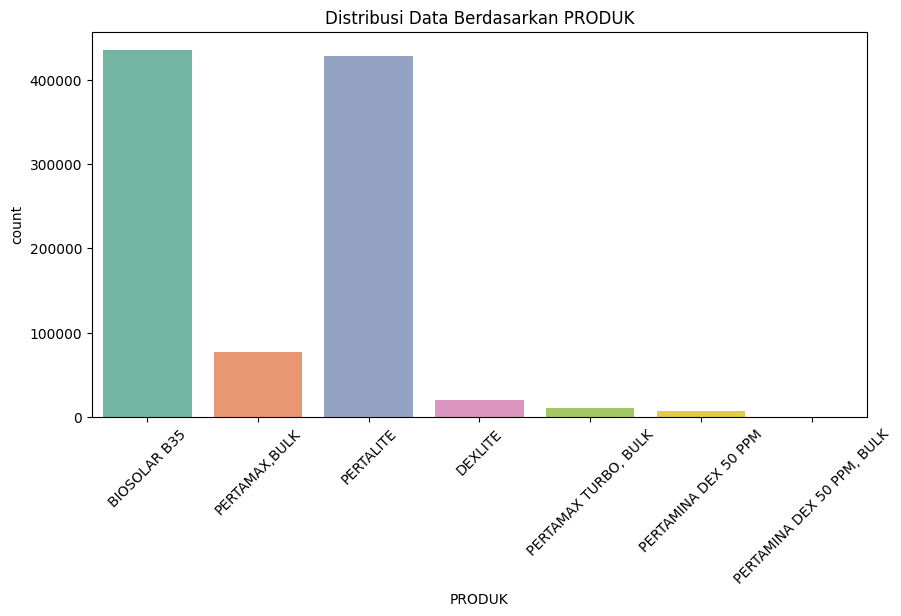

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

print("\nSTATISTIK DESKRIPSI")
display(df_mt_stop.describe())

print("\n-MISSING VALUES")
display(df_mt_stop.isnull().sum())

print("\nSTATISTIK DEKSRIPSI BERDASARKAN PRODUK")
display(df_mt_stop.groupby('PRODUK').describe())

plt.figure(figsize=(10, 5))
sns.countplot(x='PRODUK', data=df_mt_stop, palette='Set2')
plt.title('Distribusi Data Berdasarkan PRODUK')
plt.xticks(rotation=45)
plt.show()


Statistik Deskriptif untuk 'LAMA_BERHENTI_JAM':


count    977618.000000
mean          0.472284
std           0.040885
min           0.331111
25%           0.416667
50%           0.499444
75%           0.499722
max           0.666944
Name: LAMA_BERHENTI_JAM, dtype: float64

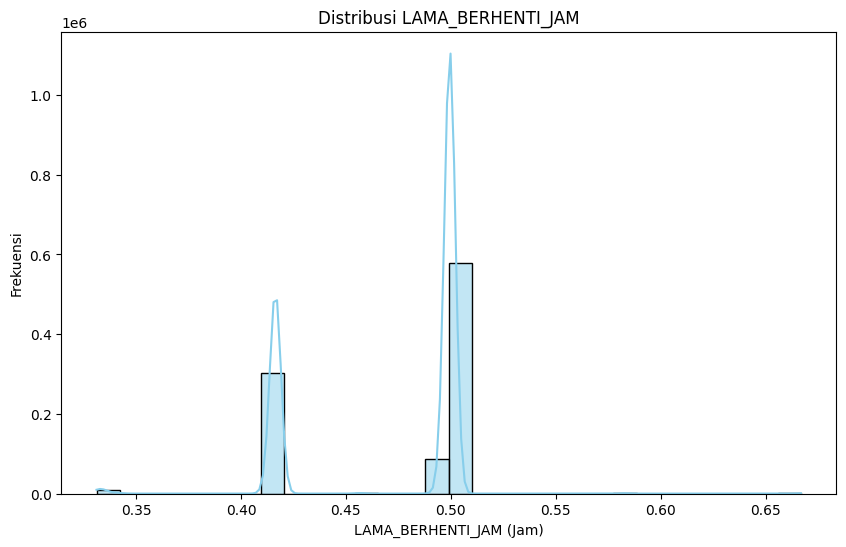

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 5: Statistik Deskriptif untuk 'LAMA_BERHENTI_JAM'
print("\nStatistik Deskriptif untuk 'LAMA_BERHENTI_JAM':")
descriptive_stats = df_mt_stop['LAMA_BERHENTI_JAM'].describe()
display(descriptive_stats)

# Membuat histogram dan KDE plot untuk 'LAMA_BERHENTI_JAM'
plt.figure(figsize=(10, 6))
sns.histplot(df_mt_stop['LAMA_BERHENTI_JAM'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi LAMA_BERHENTI_JAM')
plt.xlabel('LAMA_BERHENTI_JAM (Jam)')
plt.ylabel('Frekuensi')
plt.show()

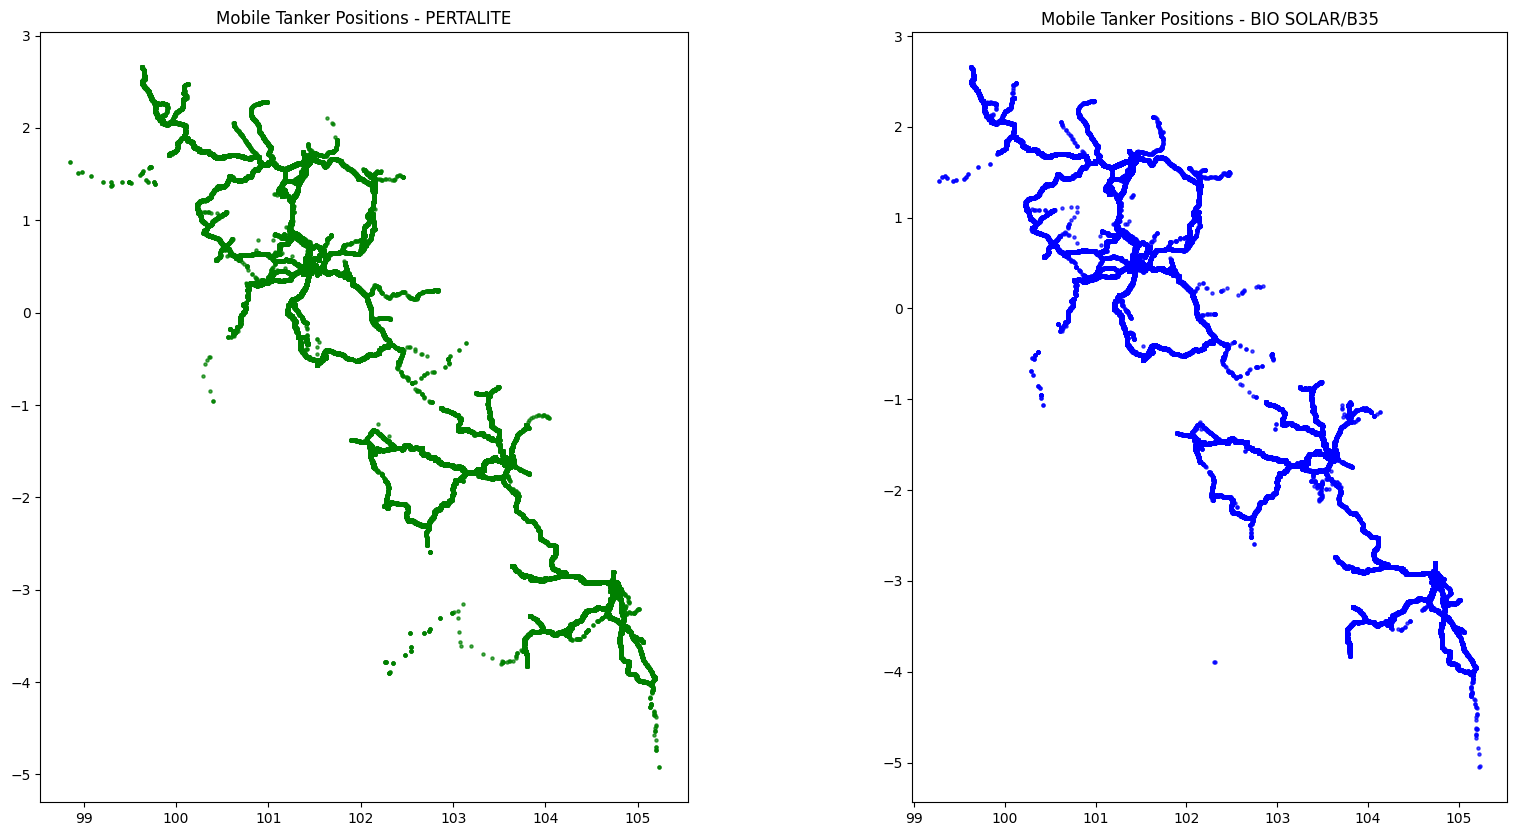

In [28]:
import geopandas as gpd
from shapely.geometry import box

# 1. Get extent of tank positions with buffer
df_pertalite = df_mt_stop[df_mt_stop['PRODUK'] == 'PERTALITE']
gdf_mt_pertalite = gpd.GeoDataFrame(df_pertalite, 
                                    geometry=gpd.points_from_xy(df_pertalite['LONG_MT'], df_pertalite['LAT_MT']))

df_solar = df_mt_stop[df_mt_stop['PRODUK'].isin(['BIO SOLAR', 'BIOSOLAR B35'])]
gdf_mt_solar = gpd.GeoDataFrame(df_solar, 
                                geometry=gpd.points_from_xy(df_solar['LONG_MT'], df_solar['LAT_MT']))

gdf_mt_pertalite.set_crs(epsg=4326, inplace=True)
gdf_mt_solar.set_crs(epsg=4326, inplace=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

gdf_mt_pertalite.plot(ax=ax1, marker='o', color='green', markersize=5, alpha=0.7)
ax1.set_title("Mobile Tanker Positions - PERTALITE")

gdf_mt_solar.plot(ax=ax2, marker='o', color='blue', markersize=5, alpha=0.7)
ax2.set_title("Mobile Tanker Positions - BIO SOLAR/B35")

plt.show()


[Step 1] Getting mobile tanker extent...
Extent bounds: (98.847403, -5.052473, 105.230096, 2.656031)

[Step 2] Reading roads within extent...
Starting file read...


Reading roads:   9%|▉         | 100000/1074130 [00:43<07:07, 2279.63it/s]

[Memory Usage: 2449.62 MB]


Reading roads:  19%|█▊        | 200000/1074130 [01:32<06:47, 2146.73it/s]

[Memory Usage: 2463.82 MB]


Reading roads:  28%|██▊       | 300000/1074130 [02:22<06:14, 2066.70it/s]

[Memory Usage: 2474.23 MB]


Reading roads:  37%|███▋      | 400000/1074130 [03:08<05:17, 2122.52it/s]

[Memory Usage: 2508.35 MB]


Reading roads:  47%|████▋     | 500000/1074130 [03:55<04:30, 2119.70it/s]

[Memory Usage: 2499.61 MB]


Reading roads:  56%|█████▌    | 600000/1074130 [04:41<03:41, 2142.91it/s]

[Memory Usage: 2571.95 MB]


Reading roads:  65%|██████▌   | 700000/1074130 [05:26<02:53, 2159.83it/s]

[Memory Usage: 2475.46 MB]


Reading roads:  74%|███████▍  | 800000/1074130 [06:16<02:10, 2102.14it/s]

[Memory Usage: 2396.53 MB]


Reading roads:  84%|████████▍ | 900000/1074130 [07:05<01:23, 2088.83it/s]

[Memory Usage: 2294.55 MB]


Reading roads:  93%|█████████▎| 1000000/1074130 [07:49<00:34, 2138.42it/s]

[Memory Usage: 2347.31 MB]


Reading roads: 100%|██████████| 1074130/1074130 [08:23<00:00, 2133.83it/s]


[Memory Usage: 2378.72 MB]

Merging chunks...
Total features before filtering: 1074130
Filtering by extent...
Total features after filtering: 640173
[Memory Usage: 2457.75 MB]
Time taken: 507.46 seconds

[Step 3] Creating 10m buffer around roads...
Road buffer creation complete
[Memory Usage: 2424.12 MB]

[Step 4] Finding mobile tanker points within road buffer...

Pertalite tankers stats:
Total points: 428482
Points near roads: 327974
Points far from roads: 100508

Biosolar tankers stats:
Total points: 435606
Points near roads: 333352
Points far from roads: 102254


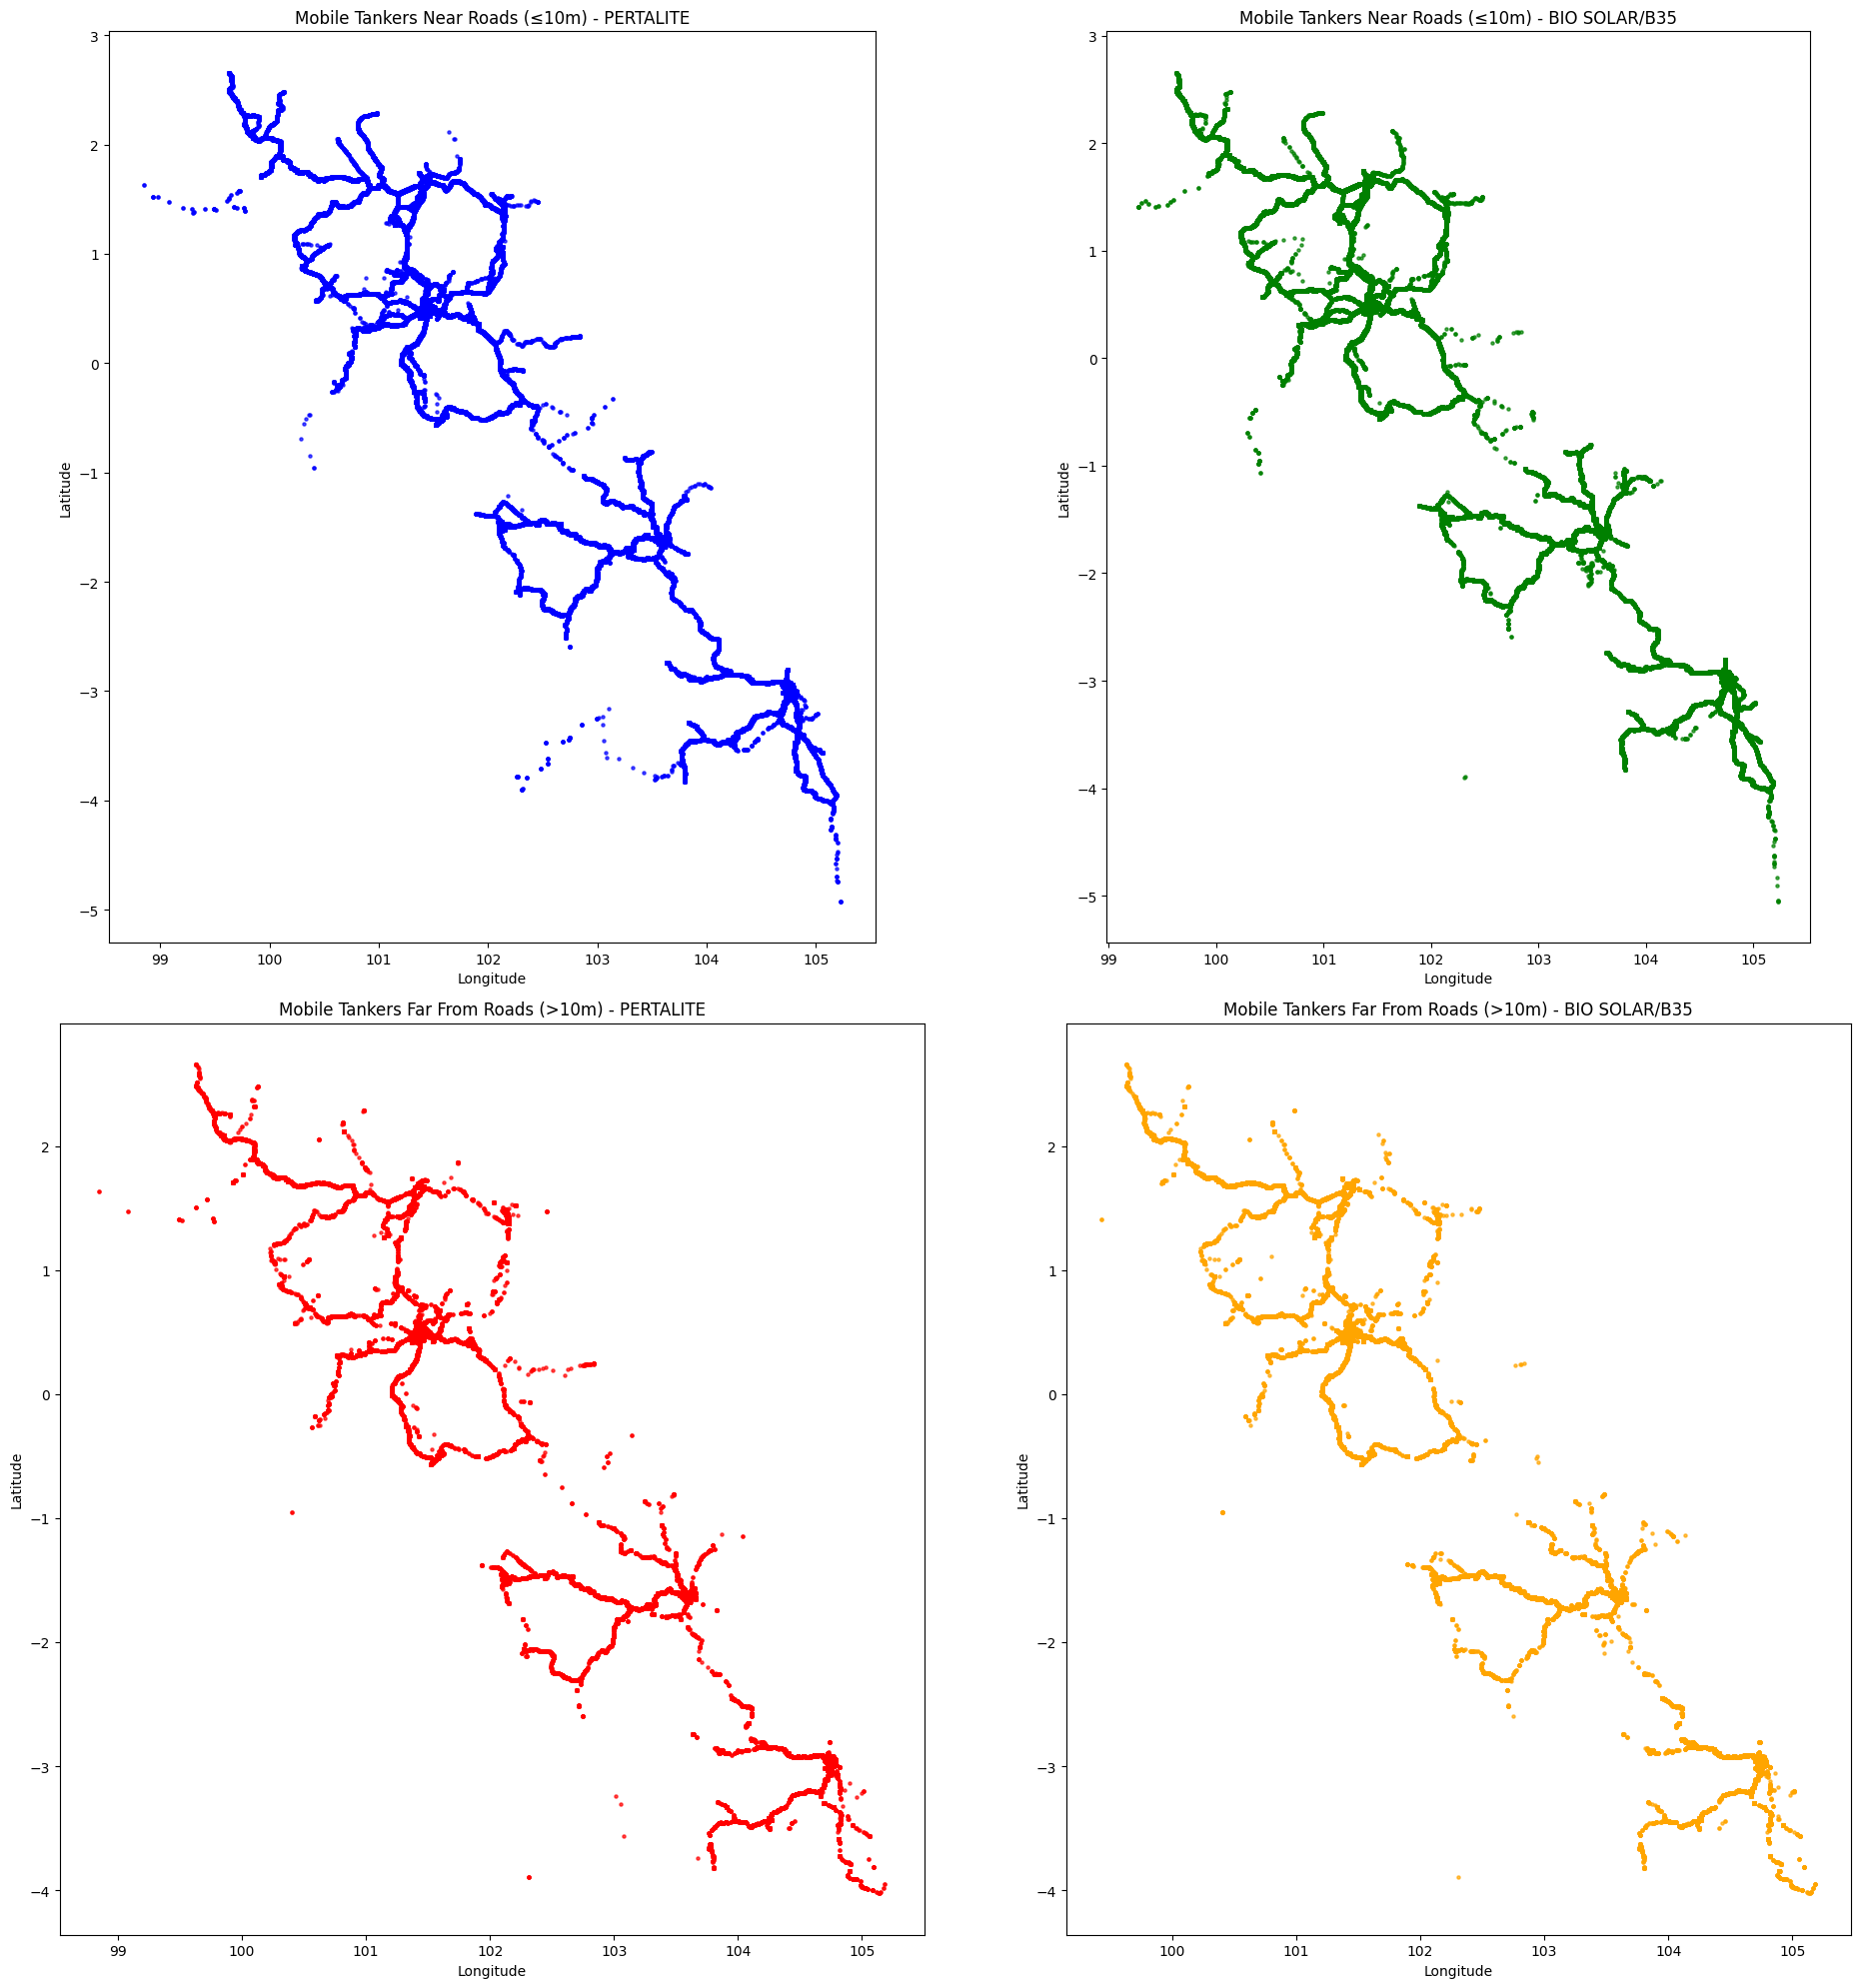


Original Pertalite points: 100508
Pertalite points near roads: 532159
Original Solar points: 102254
Solar points near roads: 536640

Total execution time: 765.05 seconds
[Memory Usage: 3063.79 MB]


In [29]:
import geopandas as gpd
import pandas as pd
import time
import psutil
import os
from tqdm import tqdm 
import fiona

def print_memory_usage():
    process = psutil.Process(os.getpid())
    mem = process.memory_info().rss / 1024 / 1024  # MB
    print(f"[Memory Usage: {mem:.2f} MB]")

start_time = time.time()

# Step 1: Get extent first from mobile tanker points
print("\n[Step 1] Getting mobile tanker extent...")
mt_extent = pd.concat([gdf_mt_pertalite, gdf_mt_solar]).total_bounds
# Convert array to tuple for bbox parameter
bbox = tuple(mt_extent)
print(f"Extent bounds: {bbox}")

# Step 2: Read roads with progress tracking
print("\n[Step 2] Reading roads within extent...")
roads_path = "data/gis_osm_roads_free_1.shp"

try:
    print("Starting file read...")
    chunks = []
    total_features = 0
    
    # Get total features count first
    with fiona.open(roads_path) as src:
        total_features = len(src)
    
    # Read in chunks with progress bar
    chunk_size = 100000  # Adjust based on memory
    with tqdm(total=total_features, desc="Reading roads") as pbar:
        for chunk_start in range(0, total_features, chunk_size):
            chunk_end = min(chunk_start + chunk_size, total_features)
            
            # Read chunk
            gdf_chunk = gpd.read_file(
                roads_path,
                rows=slice(chunk_start, chunk_end)
            )
            
            chunks.append(gdf_chunk)
            pbar.update(len(gdf_chunk))
            
            # Show memory usage per chunk
            print_memory_usage()
    
    # Combine all chunks
    print("\nMerging chunks...")
    gdf_roads = pd.concat(chunks, ignore_index=True)
    print(f"Total features before filtering: {len(gdf_roads)}")
    
    # Filter by extent
    print("Filtering by extent...")
    gdf_roads = gdf_roads.cx[bbox[0]:bbox[2], bbox[1]:bbox[3]]
    print(f"Total features after filtering: {len(gdf_roads)}")

except Exception as e:
    print(f"Error reading/filtering roads: {str(e)}")
    raise

print_memory_usage()
print(f"Time taken: {time.time() - start_time:.2f} seconds")

# Step 3: Create buffer
print("\n[Step 3] Creating 10m buffer around roads...") 
gdf_roads = gdf_roads.to_crs(epsg=3857)
gdf_roads_buffer = gpd.GeoDataFrame(
    geometry=gdf_roads.buffer(10, cap_style=3),
    crs="EPSG:3857"
)
gdf_roads_buffer = gdf_roads_buffer.to_crs(epsg=4326)
# Clean dataframes
gdf_roads_buffer = gdf_roads_buffer.reset_index(drop=True)
gdf_mt_pertalite = gdf_mt_pertalite.reset_index(drop=True)
gdf_mt_solar = gdf_mt_solar.reset_index(drop=True)

print("Road buffer creation complete")
print_memory_usage()

# Step 4: Select points within buffer
# Check for problematic column names
problem_cols = ['index_left', 'index_right']
for col in problem_cols:
    if col in gdf_mt_pertalite.columns:
        gdf_mt_pertalite = gdf_mt_pertalite.drop(columns=[col])
    if col in gdf_mt_solar.columns:
        gdf_mt_solar = gdf_mt_solar.drop(columns=[col])
    if col in gdf_roads_buffer.columns:
        gdf_roads_buffer = gdf_roads_buffer.drop(columns=[col])

# Step 4: Select points within buffer
print("\n[Step 4] Finding mobile tanker points within road buffer...")
try:
    # For Pertalite
    gdf_mt_pertalite_near_road = gpd.sjoin(
        gdf_mt_pertalite,
        gdf_roads_buffer,
        how="left",  # Ubah inner menjadi left
        predicate="intersects"
    )
    
    # Identifikasi points near road (yang memiliki index_right tidak null)
    pertalite_near_indices = gdf_mt_pertalite_near_road[gdf_mt_pertalite_near_road['index_right'].notna()].index.unique()
    
    # Get near and far points
    gdf_mt_pertalite_near = gdf_mt_pertalite.loc[pertalite_near_indices]
    gdf_mt_pertalite_far = gdf_mt_pertalite[~gdf_mt_pertalite.index.isin(pertalite_near_indices)]

    # For Solar - sama seperti Pertalite
    gdf_mt_solar_near_road = gpd.sjoin(
        gdf_mt_solar,
        gdf_roads_buffer,
        how="left",
        predicate="intersects"
    )
    
    solar_near_indices = gdf_mt_solar_near_road[gdf_mt_solar_near_road['index_right'].notna()].index.unique()
    
    gdf_mt_solar_near = gdf_mt_solar.loc[solar_near_indices]
    gdf_mt_solar_far = gdf_mt_solar[~gdf_mt_solar.index.isin(solar_near_indices)]

    # Print stats for validation
    print("\nPertalite tankers stats:")
    print(f"Total points: {len(gdf_mt_pertalite)}")
    print(f"Points near roads: {len(gdf_mt_pertalite_near)}")
    print(f"Points far from roads: {len(gdf_mt_pertalite_far)}")

    print("\nBiosolar tankers stats:")
    print(f"Total points: {len(gdf_mt_solar)}")
    print(f"Points near roads: {len(gdf_mt_solar_near)}")
    print(f"Points far from roads: {len(gdf_mt_solar_far)}")

    # Plot only if we have points to show
    if len(gdf_mt_pertalite_far) > 0 or len(gdf_mt_solar_far) > 0:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

        # Top row - Near roads points
        ax1.set_title("Mobile Tankers Near Roads (≤10m) - PERTALITE")
        if len(gdf_mt_pertalite_near_road) > 0:
            gdf_mt_pertalite_near_road.plot(ax=ax1, color='blue', markersize=5, alpha=0.7)
        ax1.set_xlabel("Longitude")
        ax1.set_ylabel("Latitude")

        ax2.set_title("Mobile Tankers Near Roads (≤10m) - BIO SOLAR/B35")
        if len(gdf_mt_solar_near_road) > 0:
            gdf_mt_solar_near_road.plot(ax=ax2, color='green', markersize=5, alpha=0.7)
        ax2.set_xlabel("Longitude")
        ax2.set_ylabel("Latitude")

        # Bottom row - Far from roads points
        ax3.set_title("Mobile Tankers Far From Roads (>10m) - PERTALITE")
        if len(gdf_mt_pertalite_far) > 0:
            gdf_mt_pertalite_far.plot(ax=ax3, color='red', markersize=5, alpha=0.7)
        ax3.set_xlabel("Longitude")
        ax3.set_ylabel("Latitude")

        ax4.set_title("Mobile Tankers Far From Roads (>10m) - BIO SOLAR/B35")
        if len(gdf_mt_solar_far) > 0:
            gdf_mt_solar_far.plot(ax=ax4, color='orange', markersize=5, alpha=0.7)
        ax4.set_xlabel("Longitude")
        ax4.set_ylabel("Latitude")

        plt.tight_layout()
        plt.show()

    else:
        print("\nNo points to plot - all points are either near or far from roads")
    
    gdf_mt_pertalite = gdf_mt_pertalite_far
    gdf_mt_solar = gdf_mt_solar_far
    
except Exception as e:
    print(f"Error in processing: {str(e)}")
    raise

print(f"\nOriginal Pertalite points: {len(gdf_mt_pertalite)}")
print(f"Pertalite points near roads: {len(gdf_mt_pertalite_near_road)}")
print(f"Original Solar points: {len(gdf_mt_solar)}")
print(f"Solar points near roads: {len(gdf_mt_solar_near_road)}")

print(f"\nTotal execution time: {time.time() - start_time:.2f} seconds")
print_memory_usage()

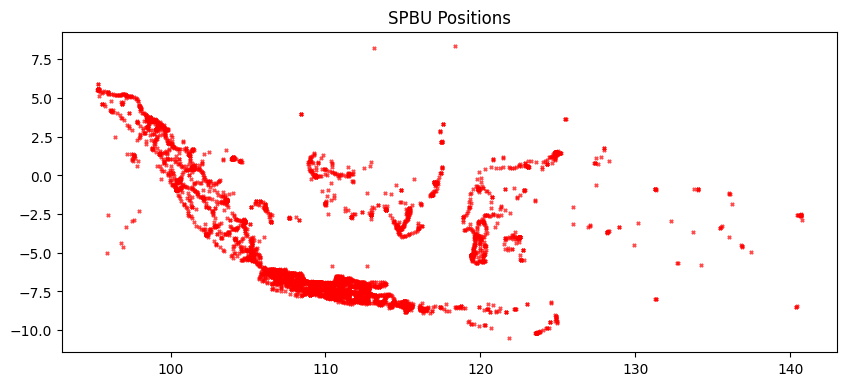

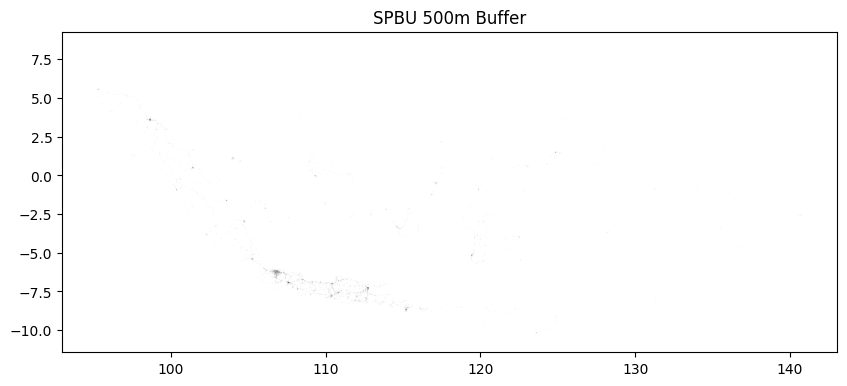

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

df_spbu = pd.read_excel("data/iedcc_tbl_spbu_profile.xlsx")
df_spbu_cleaned = df_spbu[(df_spbu['LATITUDE'].between(-90, 90)) & (df_spbu['LONGITUDE'].between(-180, 180))]

gdf_spbu = gpd.GeoDataFrame(df_spbu_cleaned, 
                            geometry=gpd.points_from_xy(df_spbu_cleaned['LONGITUDE'], df_spbu_cleaned['LATITUDE']))

gdf_spbu.set_crs(epsg=4326, inplace=True)
fig, ax = plt.subplots(figsize=(10, 10))
gdf_spbu.plot(ax=ax, marker='x', color='red', markersize=5, alpha=0.7)
plt.title("SPBU Positions")
plt.show()

gdf_spbu_projected = gdf_spbu.to_crs(epsg=3857)
gdf_spbu_projected['geometry'] = gdf_spbu_projected['geometry'].apply(lambda geom: geom.buffer(500))
gdf_spbu_buffer = gdf_spbu_projected.to_crs(epsg=4326)
gdf_spbu_buffer.columns = [col if len(col) <= 10 else col[:10] for col in gdf_spbu_buffer.columns]
#gdf_spbu_buffer.to_file("data/spbu_buffer_500m.shp")

fig, ax = plt.subplots(figsize=(10, 10))
gdf_spbu_buffer.plot(ax=ax, color='black', alpha=1)
plt.title("SPBU 500m Buffer")
plt.show()

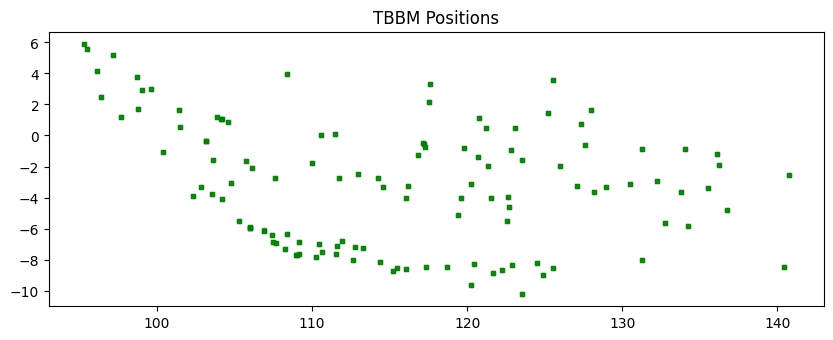

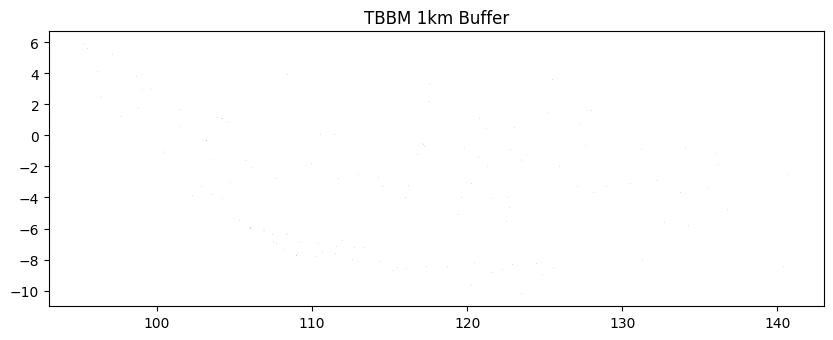

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

df_tbbm = pd.read_excel("data/iedcc_master_data_asset.xlsx")
df_tbbm_cleaned = df_tbbm[(df_tbbm['JENIS_ASSET'] == 'TBBM') &
                          (df_tbbm['LATITUDE'].between(-90, 90)) &
                          (df_tbbm['LONGITUDE'].between(-180, 180))]

gdf_tbbm = gpd.GeoDataFrame(df_tbbm_cleaned, 
                            geometry=gpd.points_from_xy(df_tbbm_cleaned['LONGITUDE'], df_tbbm_cleaned['LATITUDE']))

gdf_tbbm.set_crs(epsg=4326, inplace=True)

fig, ax = plt.subplots(figsize=(10, 10))
gdf_tbbm.plot(ax=ax, marker='s', color='green', markersize=5, alpha=0.7)
plt.title("TBBM Positions")
plt.show()

gdf_tbbm_projected = gdf_tbbm.to_crs(epsg=3857)

gdf_tbbm_projected['geometry'] = gdf_tbbm_projected['geometry'].apply(lambda geom: geom.buffer(1000))
gdf_tbbm_buffer = gdf_tbbm_projected.to_crs(epsg=4326)
gdf_tbbm_buffer.columns = [col if len(col) <= 10 else col[:10] for col in gdf_tbbm_buffer.columns]
#gdf_tbbm_buffer.to_file("data/tbbm_buffer_1km.shp")

fig, ax = plt.subplots(figsize=(10, 10))
gdf_tbbm_buffer.plot(ax=ax, color='black', alpha=1)
plt.title("TBBM 1km Buffer")
plt.show()

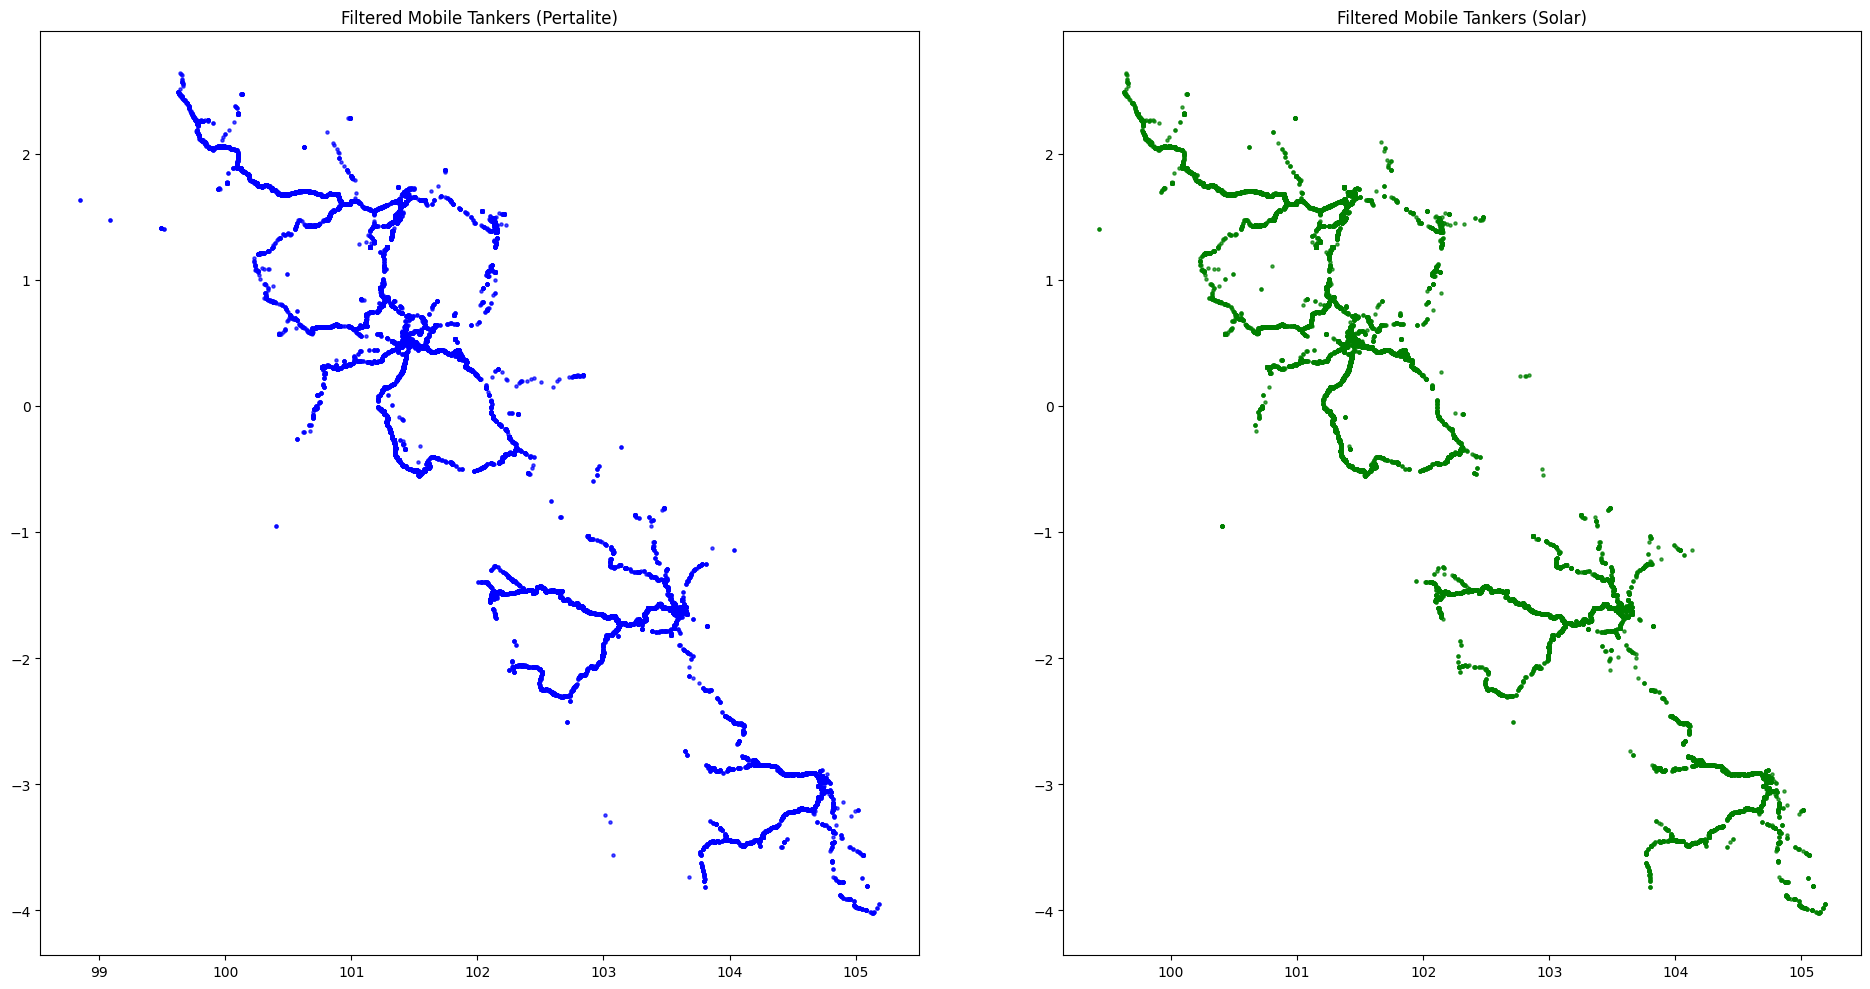

In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt

mobile_tankers_in_spbu_pertalite = gpd.sjoin(gdf_mt_pertalite, gdf_spbu_buffer, how="inner", predicate="intersects")
mobile_tankers_in_tbbm_pertalite = gpd.sjoin(gdf_mt_pertalite, gdf_tbbm_buffer, how="inner", predicate="intersects")

mobile_tankers_in_spbu_solar = gpd.sjoin(gdf_mt_solar, gdf_spbu_buffer, how="inner", predicate="intersects")
mobile_tankers_in_tbbm_solar = gpd.sjoin(gdf_mt_solar, gdf_tbbm_buffer, how="inner", predicate="intersects")

gdf_mt_filtered_pertalite = gdf_mt_pertalite[
    ~gdf_mt_pertalite.index.isin(mobile_tankers_in_spbu_pertalite.index)
]
gdf_mt_filtered_pertalite = gdf_mt_filtered_pertalite[
    ~gdf_mt_filtered_pertalite.index.isin(mobile_tankers_in_tbbm_pertalite.index)
]

gdf_mt_filtered_solar = gdf_mt_solar[
    ~gdf_mt_solar.index.isin(mobile_tankers_in_spbu_solar.index)
]
gdf_mt_filtered_solar = gdf_mt_filtered_solar[
    ~gdf_mt_filtered_solar.index.isin(mobile_tankers_in_tbbm_solar.index)
]

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

gdf_mt_filtered_pertalite.plot(ax=axes[0], marker='o', color='blue', markersize=5, alpha=0.7)
axes[0].set_title("Filtered Mobile Tankers (Pertalite)")

gdf_mt_filtered_solar.plot(ax=axes[1], marker='o', color='green', markersize=5, alpha=0.7)
axes[1].set_title("Filtered Mobile Tankers (Solar)")

plt.tight_layout()
plt.show()

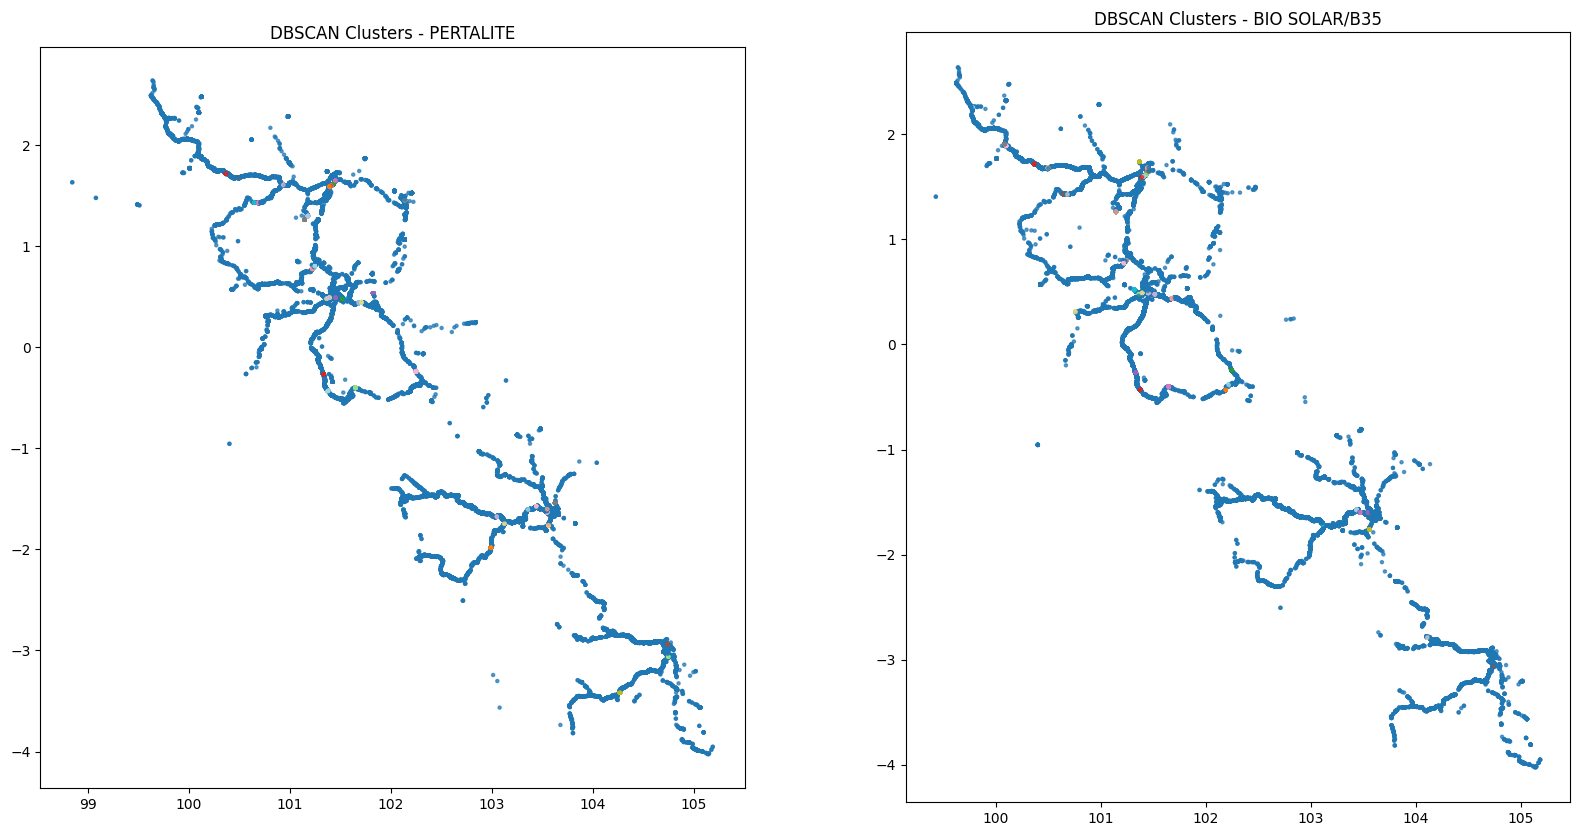

In [50]:
from sklearn.cluster import DBSCAN
import numpy as np

coords_pertalite = np.array(list(gdf_mt_filtered_pertalite.geometry.apply(lambda geom: (geom.x, geom.y))))
db_pertalite = DBSCAN(eps=0.0005, min_samples=100, metric='euclidean').fit(coords_pertalite)
gdf_mt_filtered_pertalite['cluster'] = db_pertalite.labels_

coords_solar = np.array(list(gdf_mt_filtered_solar.geometry.apply(lambda geom: (geom.x, geom.y))))
db_solar = DBSCAN(eps=0.0005, min_samples=100, metric='euclidean').fit(coords_solar)
gdf_mt_filtered_solar['cluster'] = db_solar.labels_

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

gdf_mt_filtered_pertalite.plot(ax=ax1, column='cluster', cmap='tab20', markersize=5, alpha=0.7)
ax1.set_title("DBSCAN Clusters - PERTALITE")

gdf_mt_filtered_solar.plot(ax=ax2, column='cluster', cmap='tab20', markersize=5, alpha=0.7)
ax2.set_title("DBSCAN Clusters - BIO SOLAR/B35")
plt.show()

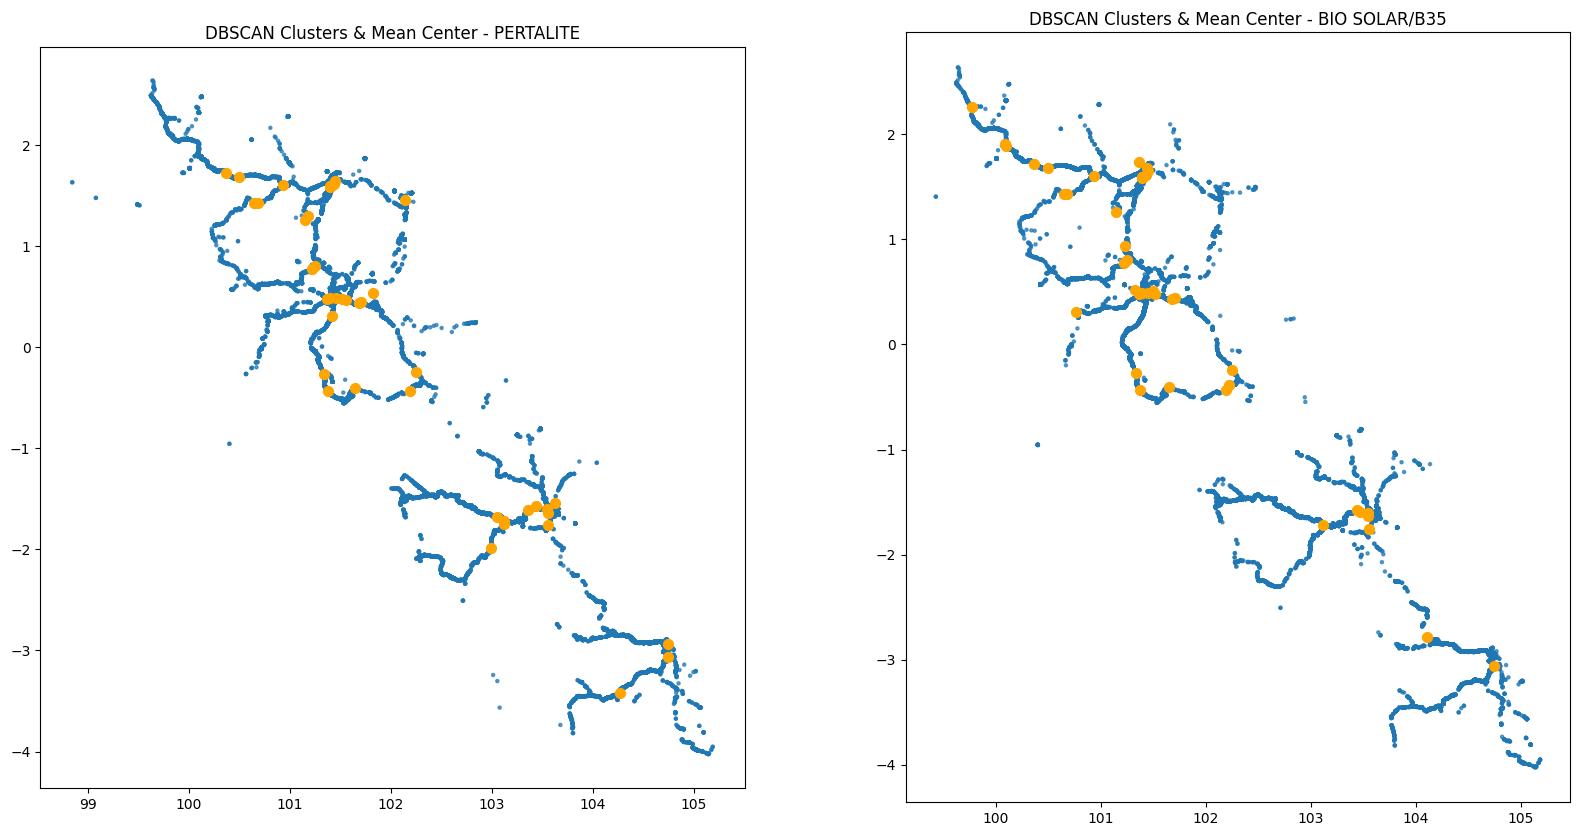

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint
import geopandas as gpd
from sklearn.cluster import DBSCAN

coords_pertalite = np.array(list(gdf_mt_filtered_pertalite.geometry.apply(lambda geom: (geom.x, geom.y))))
db_pertalite = DBSCAN(eps=0.0005, min_samples=100, metric='euclidean').fit(coords_pertalite)
gdf_mt_filtered_pertalite['cluster'] = db_pertalite.labels_

coords_solar = np.array(list(gdf_mt_filtered_solar.geometry.apply(lambda geom: (geom.x, geom.y))))
db_solar = DBSCAN(eps=0.0005, min_samples=100, metric='euclidean').fit(coords_solar)
gdf_mt_filtered_solar['cluster'] = db_solar.labels_

mean_centers_pertalite = []
mean_centers_solar = []

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

gdf_mt_filtered_pertalite.plot(ax=ax1, column='cluster', cmap='tab20', markersize=5, alpha=0.7)
clusters_pertalite = gdf_mt_filtered_pertalite['cluster'].unique()
for cluster in clusters_pertalite:
    if cluster != -1:  # Skip noise points (cluster -1)
        cluster_points = gdf_mt_filtered_pertalite[gdf_mt_filtered_pertalite['cluster'] == cluster]
        multi_point = MultiPoint(cluster_points.geometry.tolist())
        mean_center = multi_point.centroid
        
        mean_centers_pertalite.append({'cluster': cluster, 'geometry': mean_center})
        
        ax1.scatter(mean_center.x, mean_center.y, color='orange', s=50)
ax1.set_title("DBSCAN Clusters & Mean Center - PERTALITE")

gdf_mt_filtered_solar.plot(ax=ax2, column='cluster', cmap='tab20', markersize=5, alpha=0.7)
clusters_solar = gdf_mt_filtered_solar['cluster'].unique()
for cluster in clusters_solar:
    if cluster != -1:  # Skip noise points (cluster -1)
        cluster_points = gdf_mt_filtered_solar[gdf_mt_filtered_solar['cluster'] == cluster]
        multi_point = MultiPoint(cluster_points.geometry.tolist())
        mean_center = multi_point.centroid
        
        mean_centers_solar.append({'cluster': cluster, 'geometry': mean_center})
        
        ax2.scatter(mean_center.x, mean_center.y, color='orange', s=50)
ax2.set_title("DBSCAN Clusters & Mean Center - BIO SOLAR/B35")

plt.show()

gdf_mean_centers_pertalite = gpd.GeoDataFrame(mean_centers_pertalite, crs=gdf_mt_filtered_pertalite.crs)
gdf_mean_centers_pertalite.to_csv('data/mean_centers_pertalite.csv', index=False)
gdf_mean_centers_pertalite.to_file('data/mean_centers_pertalite.shp')

gdf_mean_centers_solar = gpd.GeoDataFrame(mean_centers_solar, crs=gdf_mt_filtered_solar.crs)
gdf_mean_centers_solar.to_csv('data/mean_centers_solar.csv', index=False)
gdf_mean_centers_solar.to_file('data/mean_centers_solar.shp')


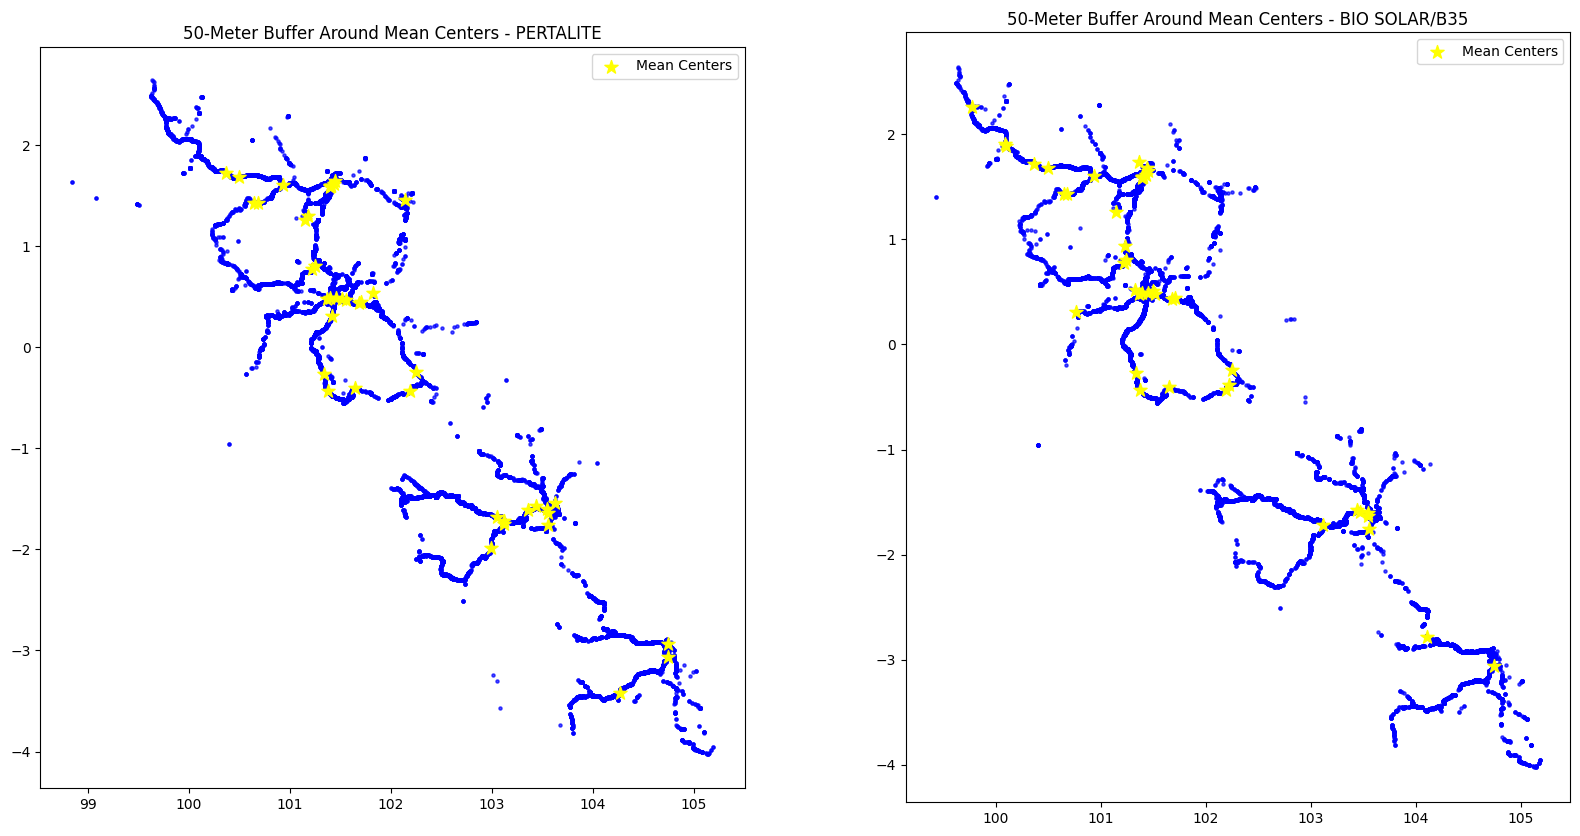

In [52]:
import geopandas as gpd6
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint

# Function to calculate mean centers, buffer, and plot
def process_mean_center_and_buffer(gdf_mt_filtered, title, ax):
    clusters = gdf_mt_filtered['cluster'].unique()

    mean_centers = []
    cluster_ids = []

    for cluster in clusters:
        if cluster != -1:  # Skip noise points (cluster -1)
            cluster_points = gdf_mt_filtered[gdf_mt_filtered['cluster'] == cluster]

            multi_point = MultiPoint(cluster_points.geometry.tolist())
            mean_center = multi_point.centroid
            mean_centers.append(mean_center)
            cluster_ids.append(cluster)

    # Create GeoDataFrame for mean centers
    gdf_mean_centers = gpd.GeoDataFrame({'cluster': cluster_ids}, geometry=mean_centers, crs="EPSG:4326")

    # Project to EPSG:3857 (meters) and create buffer
    gdf_mean_centers_projected = gdf_mean_centers.to_crs(epsg=3857)
    gdf_mean_center_buffer = gdf_mean_centers_projected.buffer(50)  # 50-meter buffer
    gdf_mean_center_buffer = gpd.GeoSeries(gdf_mean_center_buffer, crs="EPSG:3857").to_crs(epsg=4326)
    gdf_mean_center_buffer_gdf = gpd.GeoDataFrame(geometry=gdf_mean_center_buffer, crs="EPSG:4326")

    # Plot the data
    gdf_mt_filtered.plot(ax=ax, marker='o', color='blue', markersize=5, alpha=0.7)
    gdf_mean_center_buffer_gdf.plot(ax=ax, color='red', alpha=0.5)
    gdf_mean_centers.plot(ax=ax, marker='*', color='yellow', markersize=100, label="Mean Centers")

    ax.set_title(title)
    ax.legend()

# Subplots for side-by-side plotting of PERTALITE and BIOSOLAR/B35
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Process and plot PERTALITE
process_mean_center_and_buffer(gdf_mt_filtered_pertalite, "50-Meter Buffer Around Mean Centers - PERTALITE", ax1)

# Process and plot BIOSOLAR/B35
process_mean_center_and_buffer(gdf_mt_filtered_solar, "50-Meter Buffer Around Mean Centers - BIO SOLAR/B35", ax2)

# Display the plots
plt.show()

Mean centers exported to Excel: data/mean_centers_50_Meter_Buffer_Around_Mean_Centers___PERTALITE_2025-02-03_17-03-08.xlsx
Mean centers exported to Shapefile: data/mean_centers_50_Meter_Buffer_Around_Mean_Centers___PERTALITE_2025-02-03_17-03-08.shp
Mean centers exported to Excel: data/mean_centers_50_Meter_Buffer_Around_Mean_Centers___BIO_SOLAR_B35_2025-02-03_17-03-14.xlsx
Mean centers exported to Shapefile: data/mean_centers_50_Meter_Buffer_Around_Mean_Centers___BIO_SOLAR_B35_2025-02-03_17-03-14.shp


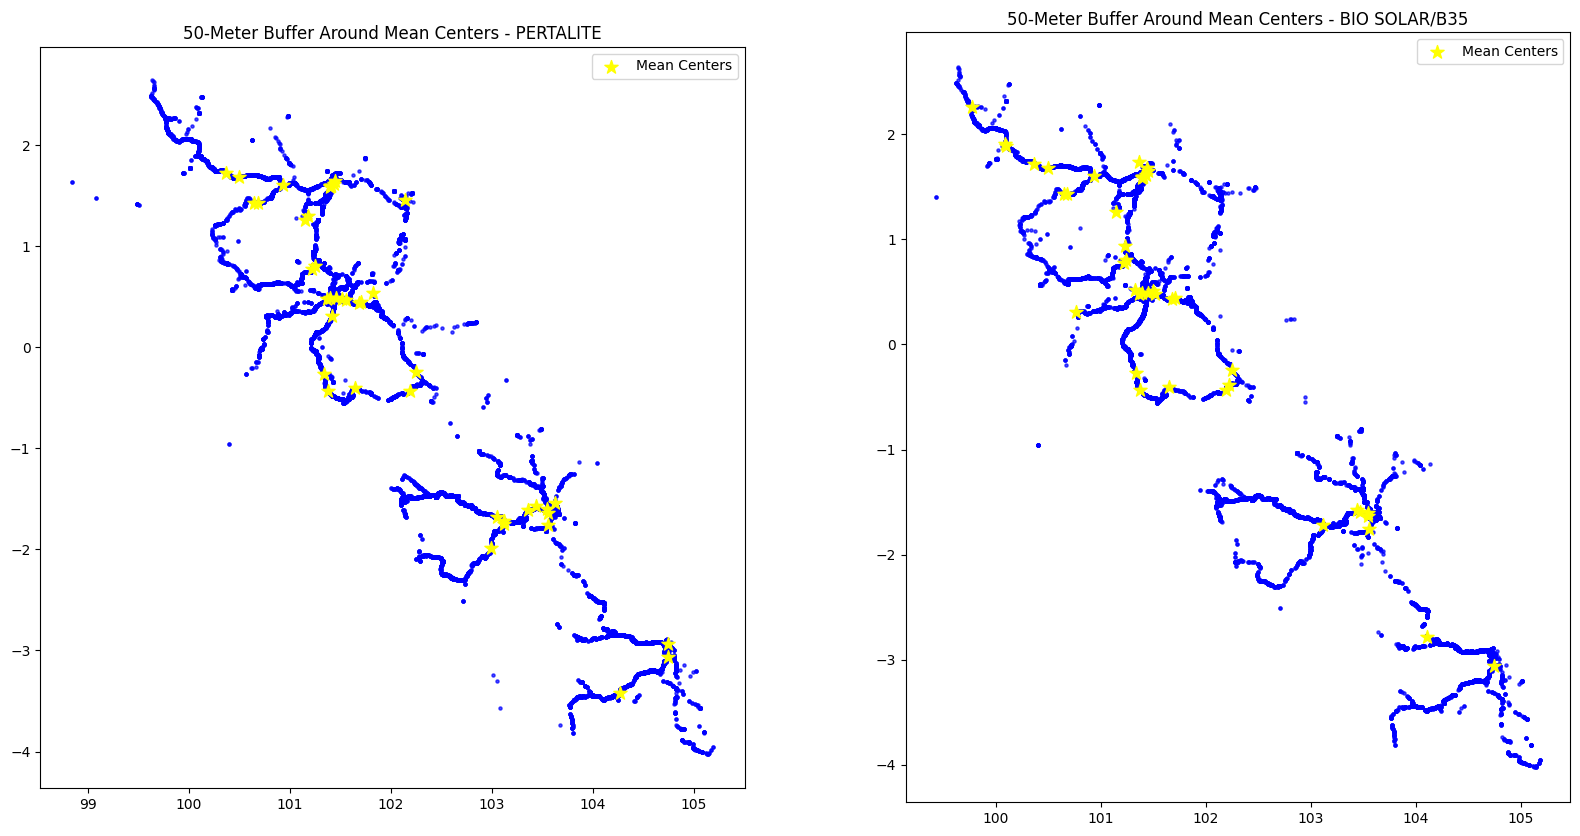

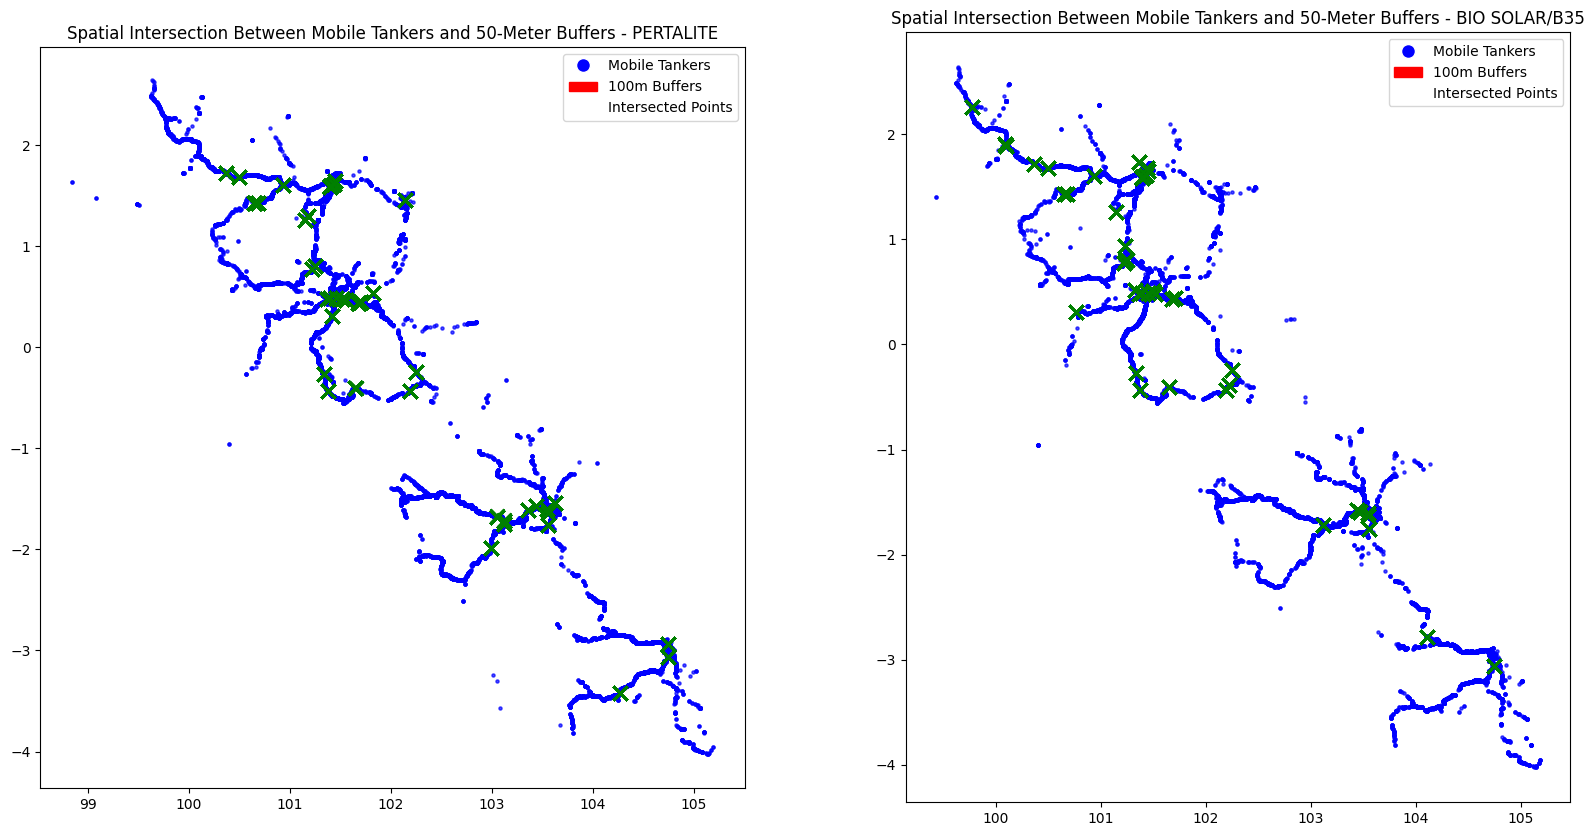

In [54]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from openpyxl.styles import PatternFill, Border, Side
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.utils import get_column_letter
from openpyxl.styles import Font
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from datetime import datetime, timedelta

def process_mean_center_and_buffer(gdf_mt_filtered, title, ax):
    clusters = gdf_mt_filtered['cluster'].unique()

    mean_centers = []
    cluster_ids = []

    for cluster in clusters:
        if cluster != -1:  # Skip noise points (cluster -1)
            cluster_points = gdf_mt_filtered[gdf_mt_filtered['cluster'] == cluster]

            multi_point = MultiPoint(cluster_points.geometry.tolist())
            mean_center = multi_point.centroid
            mean_centers.append(mean_center)
            cluster_ids.append(cluster)

    gdf_mean_centers = gpd.GeoDataFrame({'cluster': cluster_ids}, geometry=mean_centers, crs="EPSG:4326")
    gdf_mean_centers_projected = gdf_mean_centers.to_crs(epsg=3857)
    gdf_mean_center_buffer = gdf_mean_centers_projected.buffer(100) 
    gdf_mean_center_buffer = gpd.GeoSeries(gdf_mean_center_buffer, crs="EPSG:3857").to_crs(epsg=4326)
    gdf_mean_center_buffer_gdf = gpd.GeoDataFrame(geometry=gdf_mean_center_buffer, crs="EPSG:4326")
    gdf_mt_filtered.plot(ax=ax, marker='o', color='blue', markersize=5, alpha=0.7)
    gdf_mean_center_buffer_gdf.plot(ax=ax, color='red', alpha=0.5)
    gdf_mean_centers.plot(ax=ax, marker='*', color='yellow', markersize=100, label="Mean Centers")

    ax.set_title(title)
    ax.legend()

    now = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    sanitized_title = title.replace(' ', '_').replace('/', '_').replace('-', '_')
    mean_center_excel_path = f"data/mean_centers_{sanitized_title}_{now}.xlsx"
    gdf_mean_centers.to_excel(mean_center_excel_path, index=False)
    print(f"Mean centers exported to Excel: {mean_center_excel_path}")

    mean_center_shp_path = f"data/mean_centers_{sanitized_title}_{now}.shp"
    gdf_mean_centers.to_file(mean_center_shp_path)
    print(f"Mean centers exported to Shapefile: {mean_center_shp_path}")

    return gdf_mean_centers, gdf_mean_center_buffer_gdf 

def process_intersection(gdf_mt_filtered, gdf_mean_center_buffer_gdf, gdf_mean_centers, ax, file_name):
    # Perform spatial join
    gdf_intersect = gpd.sjoin(gdf_mt_filtered, gdf_mean_center_buffer_gdf, how="inner", predicate="intersects")
    
    # Merge with mean centers, explicitly specify geometry column
    gdf_intersect = gdf_intersect.merge(
        gdf_mean_centers[['cluster', 'geometry']].rename(columns={'geometry': 'geometry_mean_center'}), 
        on='cluster', 
        how='left'
    )

    # Validate data before plotting
    if len(gdf_intersect) == 0:
        print(f"No intersections found for {file_name}")
        return

    # Plot results
    gdf_mt_filtered.plot(ax=ax, marker='o', color='blue', markersize=5, alpha=0.7)
    gdf_mean_center_buffer_gdf.plot(ax=ax, color='red', alpha=0.5)
    gdf_intersect.plot(ax=ax, marker='x', color='green', markersize=100)

    # Add cluster information safely
    gdf_intersect['LAT_CLUSTER'] = gdf_intersect['geometry_mean_center'].apply(
        lambda geom: geom.y if geom is not None else None
    )
    gdf_intersect['LONG_CLUSTER'] = gdf_intersect['geometry_mean_center'].apply(
        lambda geom: geom.x if geom is not None else None
    )
    gdf_intersect['CLUSTER_ID'] = gdf_intersect['cluster']
    gdf_intersect['BUFFER_DISTANCE'] = 100

    # Clean up columns for export
    export_columns = [col for col in gdf_intersect.columns 
                     if col not in ['geometry_mean_center'] 
                     and not pd.isna(col)]

    # Export to Excel
    if 'geometry' in gdf_intersect.columns:
        df_intersect = pd.DataFrame(gdf_intersect.drop(columns=['geometry', 'geometry_mean_center']))
    else:
        df_intersect = pd.DataFrame(gdf_intersect.drop(columns=['geometry_mean_center']))

    now = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    with pd.ExcelWriter(f"data/{file_name}_{now}.xlsx", engine='openpyxl') as writer:
        df_intersect.to_excel(writer, sheet_name=f"mt_stop_{now}", index=False)
        workbook = writer.book
        worksheet = writer.sheets[f"mt_stop_{now}"]

        for col in worksheet.columns:
            max_length = 0
            column = col[0].column_letter
            for cell in col:
                try:
                    if cell.value is not None and len(str(cell.value)) > max_length:
                        max_length = len(str(cell.value))
                except Exception as e:
                    print(f"Error processing cell {cell}: {e}")
            adjusted_width = (max_length + 2)
            worksheet.column_dimensions[column].width = adjusted_width

        thin_border = Border(left=Side(style='thin'), right=Side(style='thin'),
                             top=Side(style='thin'), bottom=Side(style='thin'))
        for row in worksheet.iter_rows():
            for cell in row:
                cell.border = thin_border
                cell.fill = PatternFill(start_color='FFFFFF', end_color='FFFFFF', fill_type='solid')

        worksheet.auto_filter.ref = worksheet.dimensions

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
gdf_mean_centers_pertalite, gdf_mean_center_buffer_gdf_pertalite = process_mean_center_and_buffer(gdf_mt_filtered_pertalite, "50-Meter Buffer Around Mean Centers - PERTALITE", ax1)
gdf_mean_centers_solar, gdf_mean_center_buffer_gdf_solar = process_mean_center_and_buffer(gdf_mt_filtered_solar, "50-Meter Buffer Around Mean Centers - BIO SOLAR/B35", ax2)

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(20, 10))
process_intersection(gdf_mt_filtered_pertalite, gdf_mean_center_buffer_gdf_pertalite, gdf_mean_centers_pertalite, ax3, "pertalite")
process_intersection(gdf_mt_filtered_solar, gdf_mean_center_buffer_gdf_solar, gdf_mean_centers_solar, ax4, "biosolar")
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Mobile Tankers'),
    Patch(facecolor='red', edgecolor='red', label='100m Buffers'),
    Line2D([0], [0], marker='x', color='w', markerfacecolor='green', markersize=10, label='Intersected Points')
]
ax3.legend(handles=legend_elements)
ax3.set_title("Spatial Intersection Between Mobile Tankers and 50-Meter Buffers - PERTALITE")
ax4.legend(handles=legend_elements)
ax4.set_title("Spatial Intersection Between Mobile Tankers and 50-Meter Buffers - BIO SOLAR/B35")

plt.show()